    exposure_level dead_or_alive
0               49         alive
1               59          dead
2               24         alive
3               56         alive
4               75          dead
..             ...           ...
95              59          dead
96              29         alive
97              74          dead
98              34         alive
99              56          dead

[100 rows x 2 columns]
    exposure_level  dead_or_alive
0                1              0
1                1              0
2                1              0
3                2              0
4                6              0
..             ...            ...
95              92              1
96              96              1
97              98              1
98              98              1
99              99              1

[100 rows x 2 columns]
Optimization terminated successfully.
         Current function value: 0.532313
         Iterations 6
                           Logit Regression Re

Text(0.5, 0, 'Exposure Level')

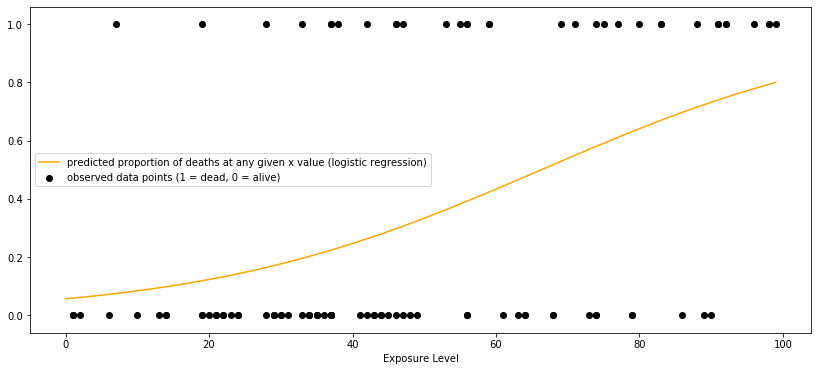

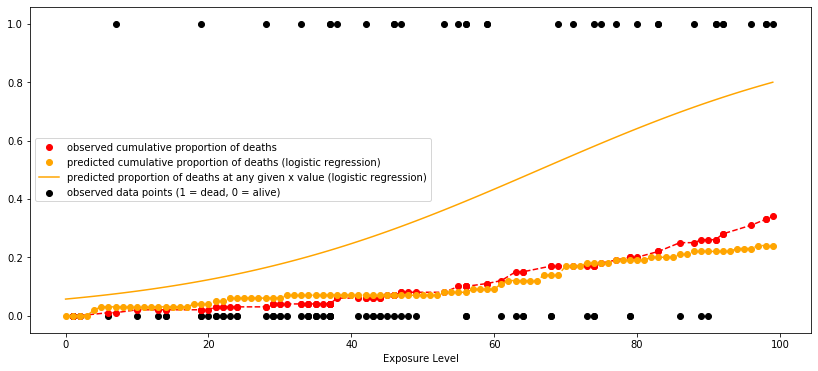

In [289]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# generating the data. The input variable is exposure level to an enviromental hazard. The outcome variable is dead/alive.

dead_or_alive = []
exposure_level = []
for i in range(100):
    exposure_level.append(np.random.randint(0,100))

for i in exposure_level:
    if i >= 0 and i < 25:
        dead_or_alive.append(np.random.choice(['dead', 'alive'], p = [0.1,0.9]))
    elif i >= 25 and i < 50:
        dead_or_alive.append(np.random.choice(['dead', 'alive'], p = [0.2,0.8]))
    elif i >= 50 and i < 75:
        dead_or_alive.append(np.random.choice(['dead', 'alive'], p = [0.4,0.6]))
    else:
        dead_or_alive.append(np.random.choice(['dead', 'alive'], p = [0.8,0.2]))
        
# creating a dataframe to store the data

df = pd.DataFrame({'exposure_level': exposure_level, 'dead_or_alive': dead_or_alive})

print(df)

df['dead_or_alive'] = df['dead_or_alive'].map({'dead': 1, 'alive': 0})
df.sort_values(by = 'exposure_level', inplace = True)
df.reset_index(drop = True, inplace = True)

print(df)

# using statsmodels to fit a logistic regression model to the data

logistic_reg = smf.logit(formula = 'dead_or_alive ~ exposure_level', data = df).fit()

print(logistic_reg.summary())

# plotting the observed data points against the logistic regression line

intercept = logistic_reg.params[0]
coeff_times_x1 = logistic_reg.params[1]*np.linspace(0,100, 100)

y = 1/(1+np.e**np.negative(intercept+coeff_times_x1))

plt.figure(1, figsize = (14,6))
plt.scatter(df['exposure_level'], df['dead_or_alive'], label = 'observed data points (1 = dead, 0 = alive)', color = 'black')
plt.plot(y, label = 'predicted proportion of deaths at any given x value (logistic regression)', color = 'orange')
plt.xlabel('Exposure Level')
plt.legend(loc = 'best')

# calculating the observed cumulative proportion of deaths

cum_prob = []
for i in df['exposure_level']:
    x_val = df['exposure_level'].iloc[i]
    cum_val = df[df['exposure_level']  <= x_val]
    cum_prob.append(sum(cum_val['dead_or_alive'] == 1)/len(df['exposure_level']))


# predicting the cumulative proportion of deaths from the logistic regression model

pred_prob = logistic_reg.predict(df['exposure_level'])

pred_prob

predicted_data_points = []

for i in df['exposure_level']:
    predicted_data_points.append(np.random.choice(['dead', 'alive'], p = [pred_prob[i], 1-pred_prob[i]]))
    
df_pred = pd.DataFrame({'exposure_level': exposure_level, 'predicted_outcome': predicted_data_points})
df_pred.sort_values(by = 'exposure_level', inplace = True)
df_pred.reset_index(drop = True, inplace = True)

df_pred['predicted_outcome'] = df_pred['predicted_outcome'].map({'dead': 1, 'alive': 0})
df_pred

pred_cum_prob = []

for i in df_pred['exposure_level']:
    x_val = df_pred['exposure_level'].iloc[i]
    pred_cum_val = df_pred[df_pred['exposure_level'] <= x_val]
    pred_cum_prob.append(sum(pred_cum_val['predicted_outcome'] == 1)/len(df_pred['exposure_level']))
    
# plotting the observed/predicted cumulative proportion of deaths against the observed 
# data points and the regression line

plt.figure(2, figsize = (14,6))

plt.plot(df['exposure_level'], cum_prob, '--', color = 'red')
plt.plot(df['exposure_level'], cum_prob, 'o', color = 'red', 
         label = 'observed cumulative proportion of deaths')
plt.plot(pred_cum_prob, 'o', color = 'orange', 
         label = 'predicted cumulative proportion of deaths (logistic regression)')
plt.plot(y, label = 'predicted proportion of deaths at any given x value (logistic regression)', color = 'orange')
plt.scatter(df['exposure_level'], df['dead_or_alive'], label = 'observed data points (1 = dead, 0 = alive)', color = 'black')
plt.plot(pred_cum_prob, '--', color = 'orange')
plt.legend(loc = 'best')
plt.xlabel('Exposure Level')